You are given an m x n integer matrix points (0-indexed). Starting with 0 points, you want to maximize the number of points you can get from the matrix.

To gain points, you must pick one cell in each row. Picking the cell at coordinates (r, c) will add points[r][c] to your score.

However, you will lose points if you pick a cell too far from the cell that you picked in the previous row. For every two adjacent rows r and r + 1 (where 0 <= r < m - 1), picking cells at coordinates (r, c1) and (r + 1, c2) will subtract abs(c1 - c2) from your score.

Return the maximum number of points you can achieve.

abs(x) is defined as:

    x for x >= 0.
    -x for x < 0.

 

Example 1:

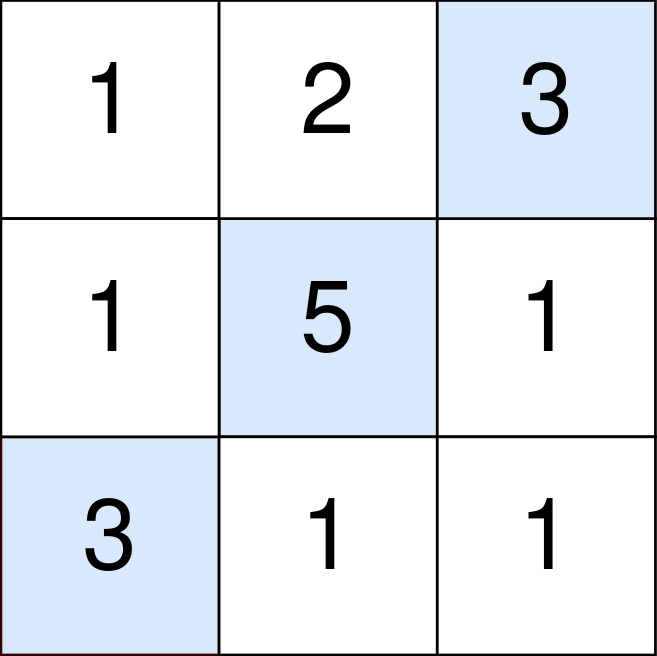

Input: points = [[1,2,3],[1,5,1],[3,1,1]]
Output: 9
Explanation:
The blue cells denote the optimal cells to pick, which have coordinates (0, 2), (1, 1), and (2, 0).
You add 3 + 5 + 3 = 11 to your score.
However, you must subtract abs(2 - 1) + abs(1 - 0) = 2 from your score.
Your final score is 11 - 2 = 9.

Example 2:

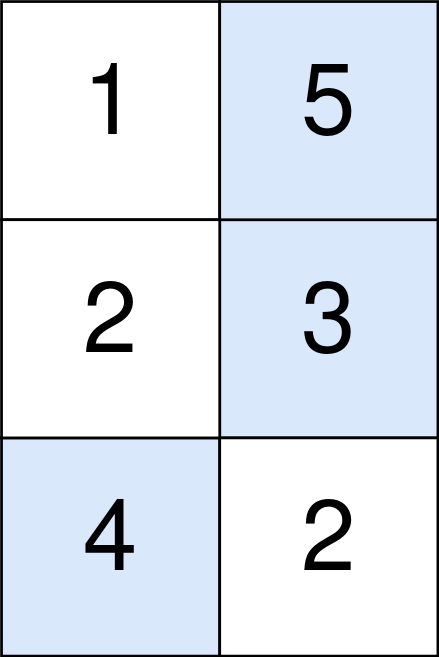

Input: points = [[1,5],[2,3],[4,2]]
Output: 11
Explanation:
The blue cells denote the optimal cells to pick, which have coordinates (0, 1), (1, 1), and (2, 0).
You add 5 + 3 + 4 = 12 to your score.
However, you must subtract abs(1 - 1) + abs(1 - 0) = 1 from your score.
Your final score is 12 - 1 = 11.

 

Constraints:

    m == points.length
    n == points[r].length
    1 <= m, n <= 105
    1 <= m * n <= 105
    0 <= points[r][c] <= 105



In [ ]:
class Solution:
    def maxPoints(self, points: List[List[int]]) -> int:
        rows, cols = len(points), len(points[0])
        previous_row = points[0]

        for row in range(1, rows):
            left_max = [0] * cols
            right_max = [0] * cols
            current_row = [0] * cols

            # Calculate left-to-right maximum
            left_max[0] = previous_row[0]
            for col in range(1, cols):
                left_max[col] = max(left_max[col - 1] - 1, previous_row[col])

            # Calculate right-to-left maximum
            right_max[-1] = previous_row[-1]
            for col in range(cols - 2, -1, -1):
                right_max[col] = max(right_max[col + 1] - 1, previous_row[col])

            # Calculate the current row's maximum points
            for col in range(cols):
                current_row[col] = points[row][col] + max(
                    left_max[col], right_max[col]
                )

            # Update previous_row for the next iteration
            previous_row = current_row

        # Find the maximum value in the last processed row
        return max(previous_row)
